In [127]:
import pandas as pd
import seaborn as sns
import string
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
def f(x):
    return x**3 + 3

def df(x):
    return 3*x**2

def tangente(x,a):
    return df(a) * (x-a) + f(a)

def tangente_zero(a):
    return a - (f(a) / df(a))

In [129]:
def racine(fct, derivate, iteration = 10):
    a = 2.5
    for i in range(iteration):
        a = a - fct(a)/derivate(a)
        print(a)

In [130]:
racine(f,df,10)

1.5066666666666668
0.5639244350466844
-2.7685979807840897
-1.9761928373643123
-1.5735216658126505
-1.4528964881677187
-1.4423274010169043
-1.4422495745072248
-1.4422495703074085
-1.4422495703074083


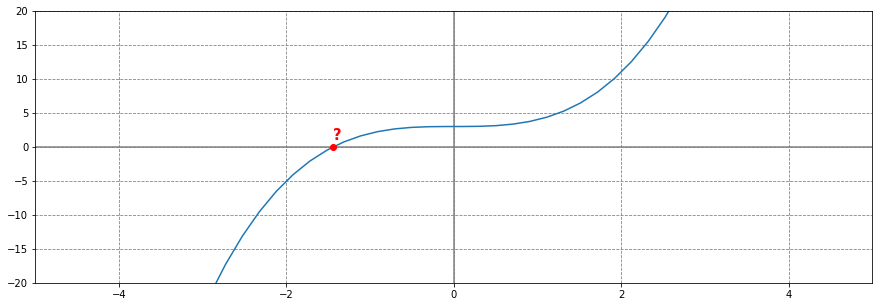

In [131]:
X = np.linspace(-10,10, 100)
Y = f(X)

figure = plt.figure(figsize=(15,5))
ax = figure.add_subplot(111)
plt.grid(color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle="-")
plt.axhline(0, color='gray', linestyle="-")

colors = plt.get_cmap("tab10").colors

plt.xlim(-5,5)
plt.ylim(-20,20)
plt.plot(X,Y, color=colors[0])

plt.plot(-1.44, 0,"ro", color="red")
plt.text(-1.44,1, "?", fontsize=15, color = "red", fontweight = "bold")




1.5066666666666668


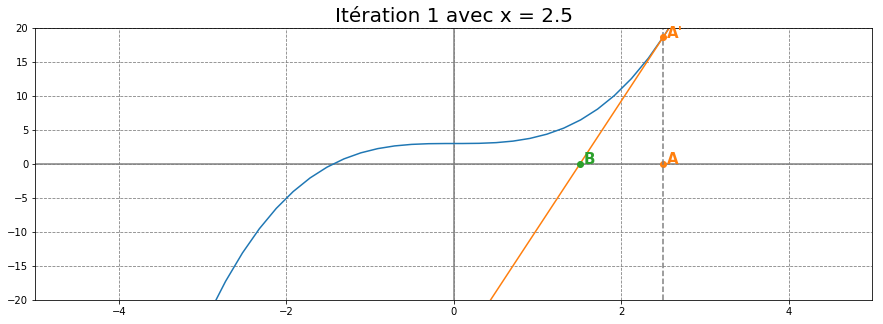

In [132]:
figure = plt.figure(figsize=(15,5))
ax = figure.add_subplot(111)
plt.grid(color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle="-")
plt.axhline(0, color='gray', linestyle="-")

colors = plt.get_cmap("tab10").colors

plt.xlim(-5,5)
plt.ylim(-20,20)
plt.plot(X,Y, color=colors[0])


start_x = 2.5
for i in range(1):
    
    plt.title("Itération {} avec x = {}".format(i+1, round(start_x,4)), fontsize=20)
    
    letter = string.ascii_uppercase[i]
    plt.plot(start_x, 0,"ro", color=colors[i+1])
    plt.text(start_x+0.05,0, letter, fontsize=15,color = colors[i+1],fontweight = "bold")
 
    #plt.savefig("test{}-1.png".format(i))

    plt.axvline(start_x, color='gray', linestyle="--")

    plt.plot(start_x, f(start_x),"ro",color=colors[i+1])
    plt.text(start_x+0.05,f(start_x), letter+"'", fontsize=15, color = colors[i+1], fontweight = "bold")

    #plt.savefig("test{}-2.png".format(i))

    plt.plot(X, tangente(X,start_x), color=colors[i+1])
    
    #plt.savefig("test{}-2.png".format(i))



    start_x = tangente_zero(start_x)
    plt.plot(start_x, 0,"ro", color=colors[i+2])
    plt.text(start_x+0.05,0, "B", fontsize=15,color = colors[i+2],fontweight = "bold")

    print(start_x)



plt.show()

# Newton versus Gradient descendant

In [133]:
X = np.random.uniform(0,100,100)
Y = X * 3.5 + np.random.normal(10,50,100)

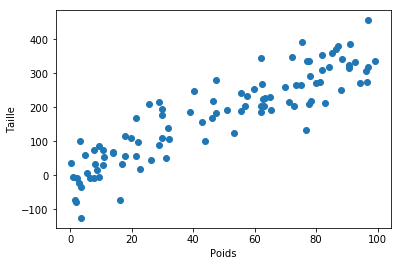

In [134]:
plt.scatter(X,Y)
plt.ylabel("Taille")
plt.xlabel("Poids")

## Definition de la fonction objective

In [141]:
# Fonction objectif 
def error(a):
    yPred      = X * a 
    yObserved  = Y 
    size       = len(X)
    
    diff = sum((yPred - yObserved)**2)/size
    return diff

# Dérivé de la fonction objective
def derror(a):
    size = len(X)
    return -2/size * sum(X * (Y - a * X))

# Dérivé second de la fonction objective
def dderror(a):
    size = len(X)
    return 2/size * sum (X*X)


def tangente(x,a):
    return dderror(a) * (x-a) + derror(a)

def tangente_zero(a):
    return a - (derror(a) / dderror(a))

3.67955204188


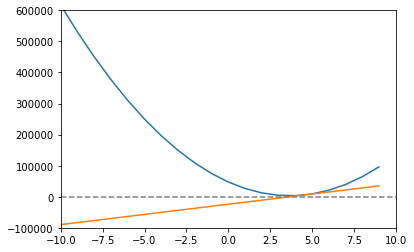

In [147]:
x    = range(-10,10)
y    = [error(a) for a in x]
yd   = [derror(a) for a in x]
ydd  = [dderror(a) for a in x]


plt.plot(x,y)
plt.plot(x,yd)
#plt.plot(x,ydd)

plt.axhline(0, color='gray', linestyle="--")
plt.xlim(-10,10)
plt.ylim(-100000,600000)



start = -7.5
#plt.plot(start, 0,"ro")
#plt.text(start+0.4,10000, "A", fontsize=15,color ="red")
#plt.axvline(start, color='gray', linestyle="--")
#plt.plot(start, derror(start),"ro")
#plt.text(start+0.4, derror(start), "A'", fontsize=15,color ="red")


#b = tangente_zero(start)
#print(b)
#plt.plot(b,0,"ro")
#plt.text(b+0.4, 0, "B", fontsize=15,color ="red")


#plt.quiver(x,y,1,yd, color='r', scale=400000)


start = -7.5

start -= derror(start)/dderror(start)
print(start)


